## Team 3 Project 1: Michael Foley, Karen Garcia, Jason Raeppold


### A First Look - Alcohol Stocks vs Cannabis Stocks

In [699]:

#Determine the following:
#-Historical industry performance
#-Industry performance comparison
#-Industry risk analysis
#-Portfolio recommendation

In [700]:
#Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import hvplot.pandas
from MCForecastTools import MCSimulation
import numpy as np
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [701]:
# Define function to create Pickle File
def get_api_dataframe():
    # Set Alpaca API key and secret

    load_dotenv()
    api_key= os.getenv("ALPACA_API_KEY")
    sec_key= os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

    alpaca = tradeapi.REST(
        api_key,
        sec_key,
        api_version="v2"
    )
# Get 3 years worth of historical data for Alcohol stocks, Cannabis Stocks, and S&P 500

    start_date = pd.Timestamp('2019-04-20', tz='America/New_York').isoformat()
    end_date = pd.Timestamp('2022-04-20', tz='America/New_York').isoformat()

    tickers = ["BUD", "DEO", "SAM", "TAP", "STZ","VFF","JAZZ","CRON", "TLRY","CGC", "SPY"]

# Set timeframe to "1Day" for Alpaca API
    timeframe = "1Day"

# Get current closing prices for All Stocks

    df_stock_data = alpaca.get_bars(
        tickers,
        timeframe,
        start = start_date,
        end = end_date
    ).df

#Set index to date
    df_stock_data.index = df_stock_data.index.date
    return df_stock_data

In [702]:
# Check if file exists
# If file does not exist then load api and save file
# else read data from pikl

api_data_file = Path("api_data.pkl")
if api_data_file.is_file():
    print ("API data file exists")
    df_stock_data = pd.read_pickle(api_data_file)
else:
    print ("API file does not exist") 
    df_stock_data = get_api_dataframe()
    df_stock_data.to_pickle(api_data_file)

#View dataframe
df_stock_data.head(-5)

API data file exists


,open,high,low,close,volume,trade_count,vwap,symbol
2019-04-22,89.69,90.4700,89.5800,89.60,970834,9479,90.000447,BUD
2019-04-23,88.56,89.7900,88.5000,89.25,755451,7907,89.242818,BUD
2019-04-24,89.02,89.1300,87.8200,88.21,1038366,11509,88.324096,BUD
2019-04-25,86.89,87.0200,86.0000,86.64,1341678,13124,86.467163,BUD
2019-04-26,87.38,87.6250,86.8300,87.58,920430,9005,87.292918,BUD
...,...,...,...,...,...,...,...,...
2022-04-06,5.16,5.2350,5.0301,5.14,480630,4559,5.137048,VFF
2022-04-07,5.13,5.1711,4.9600,5.04,356830,3783,5.061856,VFF
2022-04-08,5.01,5.0700,4.8200,4.83,1129375,6429,4.917287,VFF
2022-04-11,4.70,4.9200,4.6400,4.81,721407,5570,4.787688,VFF


In [703]:
# Use value counts to verify the same amount of data per stock symbol within the 3-year time frame.
df_stock_data["symbol"].value_counts()

BUD     757
CGC     757
CRON    757
DEO     757
JAZZ    757
SAM     757
SPY     757
STZ     757
TAP     757
TLRY    757
VFF     757
Name: symbol, dtype: int64

In [704]:
#Use pivot function to set columns as each ticker symbol with the value of close price.
all_close_prices = df_stock_data.pivot(values=["close"], columns= "symbol")
all_close_prices

close                                                        \
symbol        BUD    CGC   CRON     DEO    JAZZ     SAM     SPY     STZ   
2019-04-22  89.60  48.25  16.86  162.58  125.97  271.34  290.27  205.46   
2019-04-23  89.25  47.41  16.28  163.80  129.78  277.73  292.88  207.48   
2019-04-24  88.21  48.37  16.59  164.13  129.42  276.43  292.23  210.14   
2019-04-25  86.64  48.20  16.52  164.17  128.53  300.00  292.05  212.16   
2019-04-26  87.58  49.91  17.16  166.48  130.99  304.56  293.41  212.16   
...           ...    ...    ...     ...     ...     ...     ...     ...   
2022-04-13  58.58   7.11   3.49  207.18  162.30  375.13  443.31  248.63   
2022-04-14  58.78   6.82   3.44  209.22  167.25  365.76  437.79  251.42   
2022-04-18  58.72   5.99   3.26  207.20  164.07  357.68  437.97  252.82   
2022-04-19  59.19   5.93   3.33  203.66  166.54  364.87  445.04  253.87   
2022-04-20  61.49   5.73   3.21  205.20  168.00  361.22  444.71  258.78   

                                 
symbol        TAP   TLRY    VFF  
2019-04-22  61.16  51.82  11.56  
2019-04-23  61.28  50.26  11.08  
2019-04-24  62.51  51.30  12.29  
2019-04-25  62.80  51.27  11.62  
2019-04-26  63.83  53.15  11.57  
...           ...    ...    ...  
2022-04-13  54.29   6.42   4.88  
2022-04-14  55.61   6.02   4.69  
2022-04-18  55.63   5.74   4.47  
2022-04-19  55.87   5.83   4.52  
2022-04-20  56.78   5.41   4.45  

[757 rows x 11 columns]

In [705]:
#Select Alcohol stock tickers to create dataframe
df_alc_data = all_close_prices["close"][["BUD", "DEO", "SAM", "TAP", "STZ"]]
df_alc_data

symbol,BUD,DEO,SAM,TAP,STZ
2019-04-22,89.60,162.58,271.34,61.16,205.46
2019-04-23,89.25,163.80,277.73,61.28,207.48
2019-04-24,88.21,164.13,276.43,62.51,210.14
2019-04-25,86.64,164.17,300.00,62.80,212.16
2019-04-26,87.58,166.48,304.56,63.83,212.16
...,...,...,...,...,...
2022-04-13,58.58,207.18,375.13,54.29,248.63
2022-04-14,58.78,209.22,365.76,55.61,251.42
2022-04-18,58.72,207.20,357.68,55.63,252.82
2022-04-19,59.19,203.66,364.87,55.87,253.87


In [706]:
#Select Cannabis stock tickers to create dataframe
df_cann_data = all_close_prices["close"][["VFF", "JAZZ", "CRON", "TLRY", "CGC"]]
df_cann_data

symbol,VFF,JAZZ,CRON,TLRY,CGC
2019-04-22,11.56,125.97,16.86,51.82,48.25
2019-04-23,11.08,129.78,16.28,50.26,47.41
2019-04-24,12.29,129.42,16.59,51.30,48.37
2019-04-25,11.62,128.53,16.52,51.27,48.20
2019-04-26,11.57,130.99,17.16,53.15,49.91
...,...,...,...,...,...
2022-04-13,4.88,162.30,3.49,6.42,7.11
2022-04-14,4.69,167.25,3.44,6.02,6.82
2022-04-18,4.47,164.07,3.26,5.74,5.99
2022-04-19,4.52,166.54,3.33,5.83,5.93


In [707]:
#Drop null values
df_alc_data.dropna()

symbol,BUD,DEO,SAM,TAP,STZ
2019-04-22,89.60,162.58,271.34,61.16,205.46
2019-04-23,89.25,163.80,277.73,61.28,207.48
2019-04-24,88.21,164.13,276.43,62.51,210.14
2019-04-25,86.64,164.17,300.00,62.80,212.16
2019-04-26,87.58,166.48,304.56,63.83,212.16
...,...,...,...,...,...
2022-04-13,58.58,207.18,375.13,54.29,248.63
2022-04-14,58.78,209.22,365.76,55.61,251.42
2022-04-18,58.72,207.20,357.68,55.63,252.82
2022-04-19,59.19,203.66,364.87,55.87,253.87


In [708]:
#Drop null values
df_cann_data.dropna()

symbol,VFF,JAZZ,CRON,TLRY,CGC
2019-04-22,11.56,125.97,16.86,51.82,48.25
2019-04-23,11.08,129.78,16.28,50.26,47.41
2019-04-24,12.29,129.42,16.59,51.30,48.37
2019-04-25,11.62,128.53,16.52,51.27,48.20
2019-04-26,11.57,130.99,17.16,53.15,49.91
...,...,...,...,...,...
2022-04-13,4.88,162.30,3.49,6.42,7.11
2022-04-14,4.69,167.25,3.44,6.02,6.82
2022-04-18,4.47,164.07,3.26,5.74,5.99
2022-04-19,4.52,166.54,3.33,5.83,5.93


### Plot each portfolio dataframe to visualize the data.

In [709]:
#Plot the close prices for the Alcohol Stocks.

df_alc_data.hvplot(
    xlabel = "Date",
    ylabel = "Share Price",
    label = "Alcohol Stocks - Closing Prices"
)

:NdOverlay   [symbol]
   :Curve   [index]   (value)

In [710]:
#Plot the close prices for the Cannabis Stocks.

df_cann_data.hvplot(
    xlabel = "Date",
    ylabel = "Share Price",
    label = "Cannabis Stocks - Closing Prices"
)

:NdOverlay   [symbol]
   :Curve   [index]   (value)

### Calculate and plot the returns for each portfolio dataframe.

In [711]:
#Calculate the returns for Alcohol dataframe
alc_returns = df_alc_data.pct_change().dropna()
alc_returns

symbol,BUD,DEO,SAM,TAP,STZ
2019-04-23,-0.003906,0.007504,0.023550,0.001962,0.009832
2019-04-24,-0.011653,0.002015,-0.004681,0.020072,0.012821
2019-04-25,-0.017798,0.000244,0.085266,0.004639,0.009613
2019-04-26,0.010849,0.014071,0.015200,0.016401,0.000000
2019-04-29,0.004910,-0.002042,-0.001543,0.000783,0.001791
...,...,...,...,...,...
2022-04-13,0.010871,0.002225,-0.004511,0.011552,-0.000804
2022-04-14,0.003414,0.009847,-0.024978,0.024314,0.011221
2022-04-18,-0.001021,-0.009655,-0.022091,0.000360,0.005568
2022-04-19,0.008004,-0.017085,0.020102,0.004314,0.004153


<AxesSubplot:>

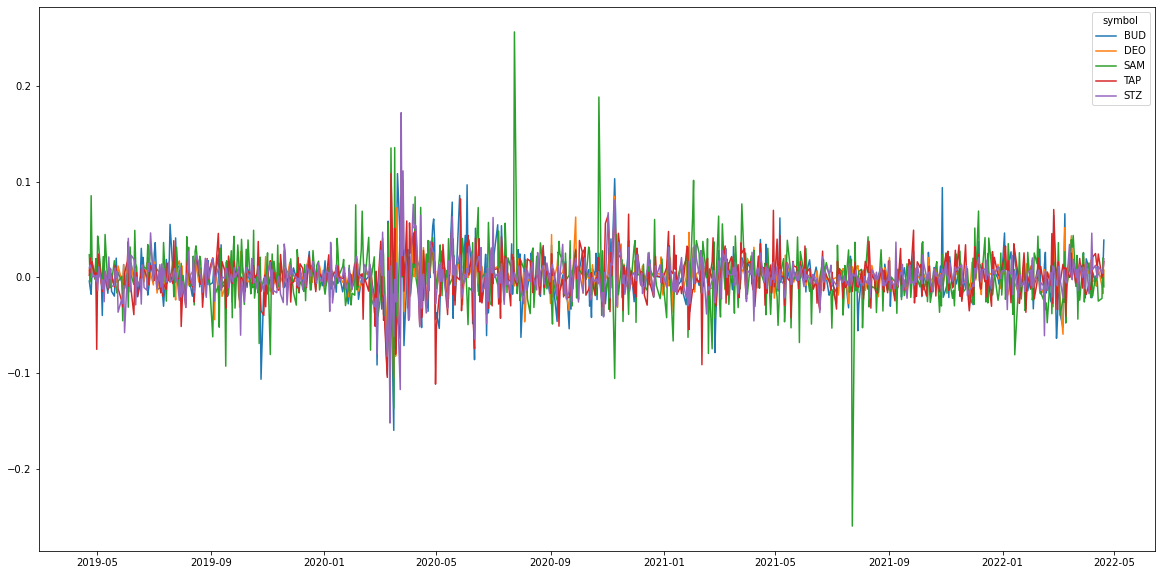

In [712]:
#Plot the returns for Alcohol Stocks
alc_returns.plot(figsize=(20,10))
#alc_returns.hvplot()

In [713]:
#Calculate the returns for Cannabis dataframe
cann_returns = df_cann_data.pct_change().dropna()
cann_returns


symbol,VFF,JAZZ,CRON,TLRY,CGC
2019-04-23,-0.041522,0.030245,-0.034401,-0.030104,-0.017409
2019-04-24,0.109206,-0.002774,0.019042,0.020692,0.020249
2019-04-25,-0.054516,-0.006877,-0.004219,-0.000585,-0.003515
2019-04-26,-0.004303,0.019140,0.038741,0.036669,0.035477
2019-04-29,0.038029,0.000458,-0.008741,-0.007902,0.042476
...,...,...,...,...,...
2022-04-13,0.027368,0.008450,0.029499,0.030498,0.048673
2022-04-14,-0.038934,0.030499,-0.014327,-0.062305,-0.040788
2022-04-18,-0.046908,-0.019013,-0.052326,-0.046512,-0.121701
2022-04-19,0.011186,0.015055,0.021472,0.015679,-0.010017


<AxesSubplot:>

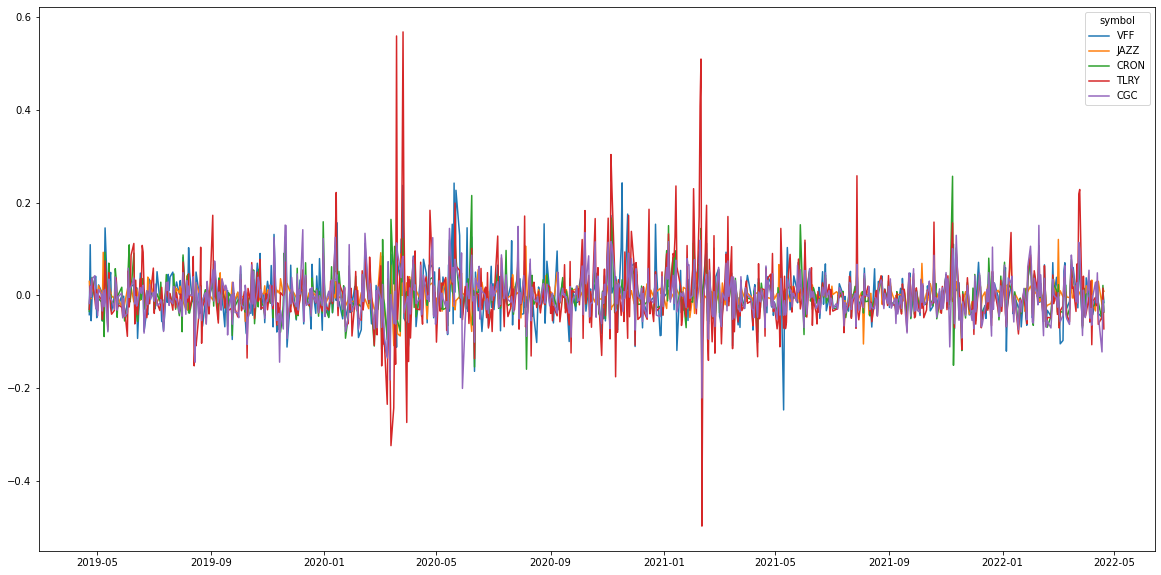

In [714]:
#Plot the Cannabis stocks returns
cann_returns.plot(figsize=(20,10))

### Calculate the weighted returns for each portfolio assuming an equal number of shares for each stock

In [715]:
# Set weights for Alcohol Stocks
weights = [0.2, 0.2, 0.2, 0.2, 0.2] # equal weights for number of portfolios

# Calculate portfolio returns for Alcohol Portfolio
alc_portfolio_returns = alc_returns.dot(weights)
# Display sample data
alc_portfolio_returns

2019-04-23    0.007788
2019-04-24    0.003715
2019-04-25    0.016393
2019-04-26    0.011304
2019-04-29    0.000780
                ...   
2022-04-13    0.003867
2022-04-14    0.004764
2022-04-18   -0.005368
2022-04-19    0.003898
2022-04-20    0.014409
Length: 756, dtype: float64

In [716]:
# Set weights for Cannabis Stocks
weights = [0.2, 0.2, 0.2, 0.2, 0.2] # equal weights for number of portfolios

# Calculate portfolio returns for Alcohol Portfolio
cann_portfolio_returns = cann_returns.dot(weights)
# Display sample data
cann_portfolio_returns

2019-04-23   -0.018638
2019-04-24    0.033283
2019-04-25   -0.013942
2019-04-26    0.025145
2019-04-29    0.012864
                ...   
2022-04-13    0.028897
2022-04-14   -0.025171
2022-04-18   -0.057292
2022-04-19    0.010675
2022-04-20   -0.029705
Length: 756, dtype: float64

In [717]:
combined_returns = pd.concat([alc_portfolio_returns, cann_portfolio_returns],axis="columns", join= "inner")
combined_returns.columns= ["Alcohol Portfolio", "Cannabis Portfolio"]
combined_returns.dropna()

,Alcohol Portfolio,Cannabis Portfolio
2019-04-23,0.007788,-0.018638
2019-04-24,0.003715,0.033283
2019-04-25,0.016393,-0.013942
2019-04-26,0.011304,0.025145
2019-04-29,0.000780,0.012864
...,...,...
2022-04-13,0.003867,0.028897
2022-04-14,0.004764,-0.025171
2022-04-18,-0.005368,-0.057292
2022-04-19,0.003898,0.010675


In [718]:
combined_returns.hvplot(
    xlabel = "Date",
    ylabel = "Returns",
    label = "Returns for Alcohol and Cannabis Portfolio"
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [719]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.hvplot(
    ylabel = "Cumulative Returns",
    xlabel = "Date",
    label = "Cumulative Returns for Alcohol and Cannabis Portfolios"
)


:NdOverlay   [Variable]
   :Curve   [index]   (value)

### Calculate and visualize the Sharpe ratios using a bar plot

In [720]:
# Annualized Sharpe Ratios
sharpe_ratio = (cumulative_returns.mean() * 252) / (cumulative_returns.std() *np.sqrt(252))
sharpe_ratio

Alcohol Portfolio     11.161182
Cannabis Portfolio   -22.933665
dtype: float64

In [721]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.hvplot.bar(
    ylabel = "Sharpe Ratio",
    label = "Sharpe Ratio for Alcohol and Cannabis Portfolios",
    rot=45
).opts(
    ylim = (-20, 20)
)

:Bars   [index]   (0)

### Compare Alcohol Portfolio and Cannabis Portfolio VS. S&P500

In [722]:
#Create dataframe for S&P 500 close prices
df_sp500_data = all_close_prices["close"][["SPY"]]
df_sp500_data

symbol,SPY
2019-04-22,290.27
2019-04-23,292.88
2019-04-24,292.23
2019-04-25,292.05
2019-04-26,293.41
...,...
2022-04-13,443.31
2022-04-14,437.79
2022-04-18,437.97
2022-04-19,445.04


In [723]:
#Calculate returns for S&P 500 Portfolio
sp500_portfolio_returns = df_sp500_data.pct_change().dropna()
sp500_portfolio_returns

symbol,SPY
2019-04-23,0.008992
2019-04-24,-0.002219
2019-04-25,-0.000616
2019-04-26,0.004657
2019-04-29,0.001568
...,...
2022-04-13,0.011454
2022-04-14,-0.012452
2022-04-18,0.000411
2022-04-19,0.016143


In [724]:
#Combine dataframes using concat function
bench_cann_alc = pd.concat([alc_portfolio_returns, cann_portfolio_returns, sp500_portfolio_returns],axis="columns", join= "inner")
bench_cann_alc.columns= ["Alcohol Portfolio", "Cannabis Portfolio", "S&P 500 Portfolio"]
bench_cann_alc.dropna()

,Alcohol Portfolio,Cannabis Portfolio,S&P 500 Portfolio
2019-04-23,0.007788,-0.018638,0.008992
2019-04-24,0.003715,0.033283,-0.002219
2019-04-25,0.016393,-0.013942,-0.000616
2019-04-26,0.011304,0.025145,0.004657
2019-04-29,0.000780,0.012864,0.001568
...,...,...,...
2022-04-13,0.003867,0.028897,0.011454
2022-04-14,0.004764,-0.025171,-0.012452
2022-04-18,-0.005368,-0.057292,0.000411
2022-04-19,0.003898,0.010675,0.016143


### Calculate annualized Sharpe Ratios for all portfolios

In [725]:
# Calculate annualized sharpe ratio
bench_sharpe_ratio = (bench_cumulative_returns.mean() * 252) / (bench_cumulative_returns.std() *np.sqrt(252))
bench_sharpe_ratio

Alcohol Portfolio     11.161182
Cannabis Portfolio   -22.933665
S&P 500 Portfolio     17.756186
dtype: float64

In [726]:
#Plot sharpe ratio for all portfolios
#bench_sharpe_ratio.plot(kind="bar", rot=45)
bench_sharpe_ratio.hvplot.bar(
    ylabel = "Sharpe Ratio",
    label = "Sharpe Ratio for Alcohol, Cannabis and S&P 500 Portfolios",
    rot=45
).opts(
    ylim = (-20, 20)
)

:Bars   [index]   (0)

### Calculate Rolling 21-Day Beta for each portfolio vs S&P 500

In [727]:
#21-Day Rolling Beta for Alcohol Portfolio vs S&P500
cov1 = bench_cann_alc["Alcohol Portfolio"].rolling(window=21).cov(bench_cann_alc["S&P 500 Portfolio"])
var1 = bench_cann_alc["S&P 500 Portfolio"].rolling(window=21).var()
beta1 = cov1 / var1
#beta1.plot(figsize=(20,10), title= "Rolling 21-Day Beta")
beta1.hvplot(
    xlabel = "Date",
    ylabel = "Beta",
    label = "Alcohol Portfolio Rolling 21-Day Beta",
    rot=45
)

:Curve   [index]   (0)

In [728]:
#21-Day Rolling Beta for Cannabis Portfolio vs S&P500
cov2 = bench_cann_alc["Cannabis Portfolio"].rolling(window=21).cov(bench_cann_alc["S&P 500 Portfolio"])
var2 = bench_cann_alc["S&P 500 Portfolio"].rolling(window=21).var()
beta2 = cov2 / var2
#beta2.plot(figsize=(20,10), title= "Rolling 21-Day Beta")
beta2.hvplot(
    xlabel = "Date",
    ylabel = "Beta",
    label = "Cannabis Portfolio Rolling 21-Day Beta",
    rot=45
)

:Curve   [index]   (0)

In [729]:
rolling_beta_combined =pd.concat([beta1, beta2], axis="columns")
rolling_beta_combined.rename(columns={ 0 :"Alcohol", 1 :"Cannabis" }, inplace=True)
rolling_beta_combined.hvplot(
    xlabel = "Date",
    ylabel = "Beta",
    label = "Combined Portfolio Rolling 21-Day Beta",
    rot=45
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

### Plot cumulative returns for Alcohol and Cannabis vs. S&P 500

In [730]:
# Calculate and plot cumulative returns of all portfolios
bench_cumulative_returns = (1 + bench_cann_alc).cumprod() - 1
bench_cumulative_returns.hvplot(
    ylabel = "Cumulative Returns",
    xlabel = "Date",
    label = "Cumulative Returns for Alcohol and Cannabis vs. S&P 500"
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)